# "Building a basic Neural Network from scratch - Kudzu"

- badges: true
- author: Anshuman Gupta

#### In this project, the idea is to write a classifier to differentiate between handwritten digits 3 and 8, from the MNIST database.

#### I will using a custom built neural network library called Kudzu.This has been developed as a part of KTF/Foundations course of Univ.ai (www.univ.ai). The source code for Kudzu Library and and this notebook can be found on my git-hub profile : www.https://github.com/anshuman6 under the folder project-solution. Any feedback and comments are welcome. Please feel free to email me at: anshuman6@gmail.com

#### 1. I will be using the MNIST database. 

#### 2. I will be comparing the results of the 4 layer NN to a standard logistic regression

##### Importing all the necessary libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

##### The following command helps us download MNIST from notebook itself. You can skip this if you already have MNIST. You can also download it via your terminal.

In [3]:
!pip install mnist # Please note, it is commented out for now, you can remove comment if you want to install it

You should consider upgrading via the '/opt/hostedtoolcache/Python/3.6.11/x64/bin/python -m pip install --upgrade pip' command.


#### Preparing the Data

In [4]:
import mnist

In [5]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()

In [6]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [7]:
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [8]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

2


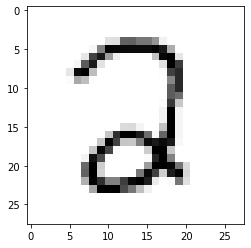

In [9]:
image_index = 7776 # You may select anything up to 60,000
print(train_labels[image_index]) 
plt.imshow(train_images[image_index], cmap='Greys')

## Filter data to get 3 and 8 out

In [10]:
train_filter = np.where((train_labels == 3 ) | (train_labels == 8))
test_filter = np.where((test_labels == 3) | (test_labels == 8))
X_train, y_train = train_images[train_filter], train_labels[train_filter]
X_test, y_test = test_images[test_filter], test_labels[test_filter]

##### We normalize the pizel values in the 0 to 1 range

In [11]:
X_train = X_train/255.
X_test = X_test/255.

And setup the labels as 1 (when the digit is 3) and 0 (when the digit is 8)

In [12]:
y_train = 1*(y_train==3)
y_test = 1*(y_test==3)

In [13]:
X_train.shape, X_test.shape

((11982, 28, 28), (1984, 28, 28))

##### We reshape the data to flatten the image pixels into a set of features or co-variates:

In [14]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_train.shape, X_test.shape

((11982, 784), (1984, 784))

##### Importing Kudzu library and its functionality

In [15]:
from kudzu.data import Data, Dataloader, Sampler
from kudzu.callbacks import AccCallback
from kudzu.loss import MSE
from kudzu.layer import Affine, Sigmoid
from kudzu.model import Model
from kudzu.optim import GD
from kudzu.train import Learner
from kudzu.callbacks import ClfCallback
from kudzu.layer import Sigmoid
from kudzu.layer import Relu

##### We are creating a class, just so that we can use it to store our parameters for us

In [16]:
class Config:
    pass
config = Config()
config.lr = 0.001
config.num_epochs = 250
config.bs = 50

##### Initializing Data

In [17]:
data = Data(X_train, y_train.reshape(-1,1))
loss = MSE()
opt = GD(config.lr)
sampler = Sampler(data, config.bs, shuffle=True)
dl = Dataloader(data, sampler)

##### Constructing 2 different layers, one for NN and one only for logistic regression.

##### Creating containers for data to be passed, to calculate accuracies

In [18]:
training_xdata = X_train
testing_xdata = X_test
training_ydata = y_train.reshape(-1,1)
testing_ydata = y_test.reshape(-1,1)

##### Initializing models and Running training loop: 

In [19]:
layers = [Affine("first", 784, 100), Relu("first"), Affine("second", 100, 100), Relu("second"), Affine("third", 100, 2), Affine("final", 2, 1), Sigmoid("final")]

model_neural = Model(layers)
model_logistic = Model([Affine("logits", 784, 1), Sigmoid("sigmoid")])

In [20]:
learner1 = Learner(loss, model_neural, opt, config.num_epochs)
acc1 = ClfCallback(learner1, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner1.set_callbacks([acc1])

In [21]:
learner1.train_loop(dl)

Epoch 0 Loss 0.24520829800738092
train accuracy is: 0.6228509430812886, test accuracy is 0.6204637096774194


Epoch 10 Loss 0.11301478185175597
train accuracy is: 0.8911700884660324, test accuracy is 0.8956653225806451


Epoch 20 Loss 0.06825878690851143
train accuracy is: 0.9262226673343348, test accuracy is 0.9359879032258065


Epoch 30 Loss 0.05112358617896959
train accuracy is: 0.9439993323318311, test accuracy is 0.9556451612903226


Epoch 40 Loss 0.04248052951771011
train accuracy is: 0.9522617259222167, test accuracy is 0.9632056451612904


Epoch 50 Loss 0.03741974670466319
train accuracy is: 0.957686529794692, test accuracy is 0.9672379032258065


Epoch 60 Loss 0.03408357825694955
train accuracy is: 0.9601902854281422, test accuracy is 0.969758064516129


Epoch 70 Loss 0.03167911303203666
train accuracy is: 0.9624436654982473, test accuracy is 0.9712701612903226


Epoch 80 Loss 0.02982364058760666
train accuracy is: 0.9648639626105825, test accuracy is 0.9717741935483871


Epoch 90 Loss 0.028337514492008088
train accuracy is: 0.9670338841595727, test accuracy is 0.9707661290322581


Epoch 100 Loss 0.027107430058534845
train accuracy is: 0.9688699716241028, test accuracy is 0.9717741935483871


Epoch 110 Loss 0.026066307673629188
train accuracy is: 0.9702053079619429, test accuracy is 0.9722782258064516


Epoch 120 Loss 0.025157545649971545
train accuracy is: 0.971290268736438, test accuracy is 0.9722782258064516


Epoch 130 Loss 0.024345489228180247
train accuracy is: 0.9716241028208981, test accuracy is 0.9737903225806451


Epoch 140 Loss 0.02361851465911821
train accuracy is: 0.9729594391587381, test accuracy is 0.9737903225806451


Epoch 150 Loss 0.022958735525862365
train accuracy is: 0.9732932732431981, test accuracy is 0.9737903225806451


Epoch 160 Loss 0.022352316048392506
train accuracy is: 0.9742947754965782, test accuracy is 0.9742943548387096


Epoch 170 Loss 0.02178720334005331
train accuracy is: 0.9747955266232682, test accuracy is 0.9742943548387096


Epoch 180 Loss 0.021261601230864787
train accuracy is: 0.9754631947921882, test accuracy is 0.9742943548387096


Epoch 190 Loss 0.020774419498956993
train accuracy is: 0.9757970288766483, test accuracy is 0.9737903225806451


Epoch 200 Loss 0.020313861210122568
train accuracy is: 0.9763812385244534, test accuracy is 0.9742943548387096


Epoch 210 Loss 0.01987479057012885
train accuracy is: 0.9773827407778334, test accuracy is 0.9747983870967742


Epoch 220 Loss 0.01945723227877734
train accuracy is: 0.9778000333834085, test accuracy is 0.9753024193548387


Epoch 230 Loss 0.019060049501773188
train accuracy is: 0.9787180771156735, test accuracy is 0.9753024193548387


Epoch 240 Loss 0.01867610762090348
train accuracy is: 0.9792188282423635, test accuracy is 0.9753024193548387


0.0025585035940852087

##### Now running only the logistic regression based classification to compare results with NN

In [22]:
learner2 = Learner(loss, model_logistic, opt, config.num_epochs)
acc2 = ClfCallback(learner2, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner2.set_callbacks([acc2])

In [23]:
learner2.train_loop(dl)

Epoch 0 Loss 0.23169113265064448
train accuracy is: 0.7056417960273744, test accuracy is 0.704133064516129


Epoch 10 Loss 0.10583473528970308
train accuracy is: 0.8963445167751627, test accuracy is 0.9077620967741935


Epoch 20 Loss 0.08127025494316635
train accuracy is: 0.9219662827574695, test accuracy is 0.9339717741935484


Epoch 30 Loss 0.06982684993445858
train accuracy is: 0.9323985978968453, test accuracy is 0.9480846774193549


Epoch 40 Loss 0.06293745430371786
train accuracy is: 0.9377399432482056, test accuracy is 0.952116935483871


Epoch 50 Loss 0.058241301800189514
train accuracy is: 0.9406609914872308, test accuracy is 0.9566532258064516


Epoch 60 Loss 0.05479128539808712
train accuracy is: 0.943832415289601, test accuracy is 0.9581653225806451


Epoch 70 Loss 0.052127014478713554
train accuracy is: 0.9470872976130863, test accuracy is 0.9596774193548387


Epoch 80 Loss 0.04999190090694071
train accuracy is: 0.9489233850776164, test accuracy is 0.9627016129032258


Epoch 90 Loss 0.048231526434408825
train accuracy is: 0.9512602236688366, test accuracy is 0.9637096774193549


Epoch 100 Loss 0.04675095519488819
train accuracy is: 0.9528459355700217, test accuracy is 0.9637096774193549


Epoch 110 Loss 0.04548160033603742
train accuracy is: 0.9540978133867468, test accuracy is 0.9652217741935484


Epoch 120 Loss 0.044378147970552916
train accuracy is: 0.9549323985978968, test accuracy is 0.9657258064516129


Epoch 130 Loss 0.04340691116262666
train accuracy is: 0.9554331497245869, test accuracy is 0.9657258064516129


Epoch 140 Loss 0.042544332968077914
train accuracy is: 0.956100817893507, test accuracy is 0.9657258064516129


Epoch 150 Loss 0.041769888628226524
train accuracy is: 0.956518110499082, test accuracy is 0.9652217741935484


Epoch 160 Loss 0.04107112062846461
train accuracy is: 0.957269237189117, test accuracy is 0.9652217741935484


Epoch 170 Loss 0.040435029637091925
train accuracy is: 0.957603071273577, test accuracy is 0.9647177419354839


Epoch 180 Loss 0.03985329477050181
train accuracy is: 0.9581872809213821, test accuracy is 0.9642137096774194


Epoch 190 Loss 0.03931805141684469
train accuracy is: 0.9585211150058421, test accuracy is 0.9647177419354839


Epoch 200 Loss 0.0388239137309064
train accuracy is: 0.958604573526957, test accuracy is 0.9647177419354839


Epoch 210 Loss 0.03836574326306924
train accuracy is: 0.9589384076114171, test accuracy is 0.9647177419354839


Epoch 220 Loss 0.03793846725523919
train accuracy is: 0.9590218661325322, test accuracy is 0.9662298387096774


Epoch 230 Loss 0.03754019074880883
train accuracy is: 0.9597729928225672, test accuracy is 0.9662298387096774


Epoch 240 Loss 0.0371666094145772
train accuracy is: 0.9600233683859122, test accuracy is 0.9662298387096774


0.013593909007787956

### Comparing results of NN and LR

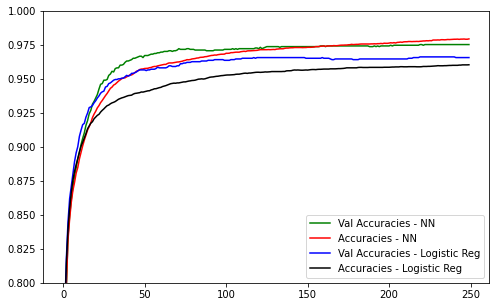

In [24]:
plt.figure(figsize=(8,5))
plt.plot(acc1.val_accuracies, 'g-', label = "Val Accuracies - NN")
plt.plot(acc1.accuracies, 'r-', label = "Accuracies - NN")
plt.plot(acc2.val_accuracies, 'b-', label = "Val Accuracies - Logistic Reg")
plt.plot(acc2.accuracies, 'k-', label = "Accuracies - Logistic Reg")
plt.ylim(0.8,1) ## for a more spread out view
plt.legend()

### Clearly NN has a better accuracy over LR; NN is overfitting - Validation accuracy (green) has dropped below training accuracy (orange), also they are diverging. This problem is not seen in LR

##### Now we will be moving through the network, till the output of the second last affine where we get a 2 dimensional output. We will be plotting this 2d output and probability contours

In [25]:
model_new = Model(layers[:-2])

In [26]:
plot_testing = model_new(testing_xdata)

##### Plotting the scatter plot of points and color coding by class

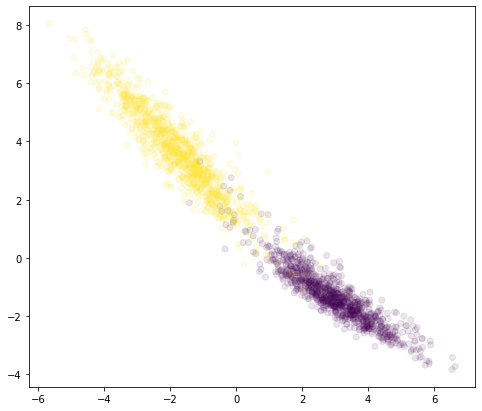

In [27]:
plt.figure(figsize=(8,7))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel());

##### Plotting probability contours

In [28]:
model_prob = Model(layers[-2:]) ## picking only last two layers to get probability. That is affine followed by sigmoid

In [29]:
xgrid = np.linspace(-4, 1, 100) ## Adjust these values based on above chart, roughly -4 to 1
ygrid = np.linspace(-7.5, 7.5, 100) ## Adjust these values based on above chart, roughly -7.5, 7.5
xg, yg = np.meshgrid(xgrid, ygrid)
# xg and yg are now both 100X100, lets convert them to single arrays 

xg_interim = np.ravel(xg)
yg_interim = np.ravel(yg)

## xg_interim, yg_interim are now arrays of len 10000, now we will stack them and then transpose to get desired shape of n rows, 2 columns

X_interim = np.vstack((xg_interim, yg_interim)) ## Please note vstack takes in a tuple
X = X_interim.T

## We want a shape of n rows and 2 columns to be able to feed this to last affine
## This last affine takes only two columns, hence the above transformation
probability_contour = model_prob(X).reshape(100,100) ## to make it consistent with xg, yg

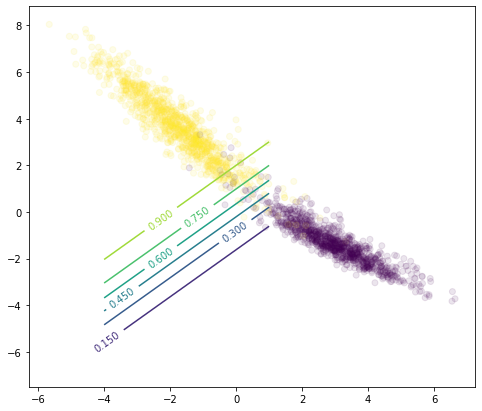

In [30]:
plt.figure(figsize=(8,7))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel())
contours = plt.contour(xg,yg,probability_contour)
plt.clabel(contours, inline = True );